<a href="https://colab.research.google.com/github/jugernaut/ProgramacionEnParalelo/blob/desarrollo/RedesNeuronales/02_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Perceptron</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Ángel Pérez León.

# Introducción

El perceptrón es un tipo de neurona artificial que fue inventada en 1957 por Frank Rosenblatt.

Las principales diferencias con respecto a las neuronas vistas previamente es que el perceptrón es capaz de aprender (machine learning) y además su valores de entrada y de salida son binarios. Aunque no es complicado modificar el modelo para tratar con campos no binarios.


#  Anatomía del Perceptrón

Todos los elementos vistos previamente se mantienen.

*   **Entradas**
*   **Pesos**
*   **Sesgo**
*   **Función de activación**

Aunque para el caso particular del perceptrón, la función de activavción será la conocida como paso binario y es tan sencilla como la siguiente imagen.

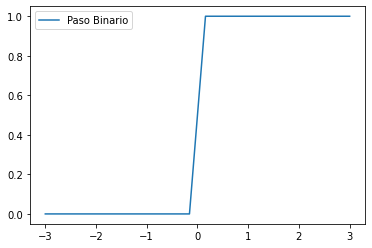

In [ ]:
# se importan algunas funciones importantes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
# dominio de las graficas
x = np.linspace(-3, 3, 20)

# funciones comunes de activasion
PasoBinario = lambda x: np.heaviside(x,1)

# Definimos algunos parámetros para la gráfica
plt.plot(x, PasoBinario(x),label="Paso Binario")
plt.legend()

# Mostramos la leyenda de las gráficas
plt.show()

Es decir.

$$f\left(x\right)=\begin{cases}
1 \quad si & x\gt0\\
0 \quad & e.o.c.
\end{cases}$$

En el contexto de las redes neuronales podemos pensar en esta función de la siguiente manera.

$$f\left(\vec{x}\right)=\begin{cases}
1 \quad si & \vec{w} * \vec{x} +b\gt0\\
0 \quad & e.o.c.
\end{cases}$$

Donde:

*   $\vec{w}$ es el vector de pesos asociados a las entradas.
*   $\vec{x}$ es el vector de entradas.
*   $b$ es el sesgo o bias.

Estos cambios en la función de activación se deben a que, para fines prácticos es mejor pensar en las entradas de una neurona (o red neuronal) como un vector, además recordemos que las GPU's estan optimizadas para operaciones con vectores y con matrices.


## Ejemplo operador *AND*

Igual que en el caso del cerebro humano, existen diferentes zonas del cerebro que muestran actividad con diferentes estimulos, tratemos de diseñar una neurona artificial que funcione reproduzca el comportamiento del operador logico *AND* (&&). 

Recordemos la tabla de verdad de este operador lógico.

| $x_1$ | $x_2$ | $and$ | 
| :-:   |    :-:|  :-:  | 
| 0     | 0     | 0     |
| 0     | 1     | 0     |
| 1     | 0     | 0     |
| 1     | 1     | 1     |

La idea es que podamos definir un algoritmo que funcione como el operador lógico *AND*.


### Inteligencia Artificial (tradicional)

La forma más sencilla de definir este operador es con un *if*, es decir.

In [3]:
# neurona básica que solo recibe 3 parametros y los suma
def perceptrAND(x, w=None, b=None):
    if x[0]==1 and x[1]==1:
        return 1
    else:
        return 0

print(perceptrAND([0,0])) 


0


Esta es la forma tradicional en la cual se resolvian muchos de los problemas de inteligencia artificial antes de la llegada del *machine learning*.

El código de la celda anterior funciona y resuelve el problema planteado inicialmente, sin embargo esta solución es estática, ya no puede modificarse por si misma para "aprender" un nuevo comportamiento.

### Razonamiento cognitivo

Veamos otra forma de solucionar el mismo problema.

Lo primero que debemos notar de la tabla de verdad es que, si c**ambiamos el orden de las entradas** ($x_1, x_2$) en cada caso, el resultado no cambia.

Lo segundo que hay que notar es que la suma $\vec{w} * \vec{x} +b$ siempre debe ser negativa, excepto cuando $x_1=1$ y $x_2=1$, tal como se muestra en la tabla de verdad.

Reescribiendo nuestra tabla de verdad para considerar las entradas del perceptron la podemos pensar de la siguiente forma.

\begin{array}{c}
1w+1w+b>0\\
0w+1w+b\leq0\\
1w+0w+b\leq0\\
0w+0w+b\leq0 
\end{array} \\tag{1}

Por otro lado, sabemos que:

*   $x*0=0$
*   $1x+1x=2x$
*   $1x=x$



# Pesos (Weight) y Sesgo (Bias)

Los pesos son un elemento importante dentro de toda red neuronal artificial, ya que indican que tan fuerte o débil debe ser la conexión entre la neurona y las señales de entrada.

Imaginemos que se quiere usar una neurona artificial para determinar si es buena idea invertir en una empresa dedicada al desarrollo de microprocesadores.

Las entradas que recibiría nuestra neurona seguirían siendo las 3 variables antes mencionadas $(x_1, x_2, x_3)$, pero en este caso estos valores representan:

*   $x_1:$ valor del oro en la bolsa de valores.
*   $x_2:$ cotización en la ultima semana de dicha empresa.
*   $x_3:$ probabilidad de lluvia.

**Pesos**: ahora nos interesa modelar que el valor del oro tiene una mayor relevancia en la fabricación de un microporocesador que la probabilidad de lluvia y de la misma manera la cotización de la empresa en la última semana. Por lo que los pesos para cada señal de entrada serían:

*   $w_1:$ relevancia del valor del oro.
*   $w_2:$ relevancia de la cotización de la empresa.
*   $w_3:$ relevancia de probabilidad de lluvia.

**Sesgo (Bias)**: el sesgo es un valor (normalmente llamado $b$) que ayuda a modificar la suma ponderada de las señales de entrada. De tal manera que este sesgo permite modificar la salida de la función de activación. 




In [ ]:
'''
  x1: valor del oro
  x2: cotizacion de la empresa
  x3: probabilidad de lluvia
'''
def neurona2(x1, x2, x3):
    # sesgo
    b = -2.0
    # suma ponderada
    suma = x1*0.9+x2*0.6+x3*.02
    # se imprime el resultado
    print(b+suma) 

# interactivo 
interact(neurona2, x1=widgets.IntSlider(min=-1,max=3,step=1,value=0), 
         x2=widgets.IntSlider(min=-1,max=3,step=1,value=0),x3=widgets.IntSlider(min=-1,max=3,step=1,value=0))

interactive(children=(IntSlider(value=0, description='x1', max=3, min=-1), IntSlider(value=0, description='x2'…

<function __main__.neurona2>

# Función de Activación

Diremos que una neurona se activa cuando transmite y establece una conexión con el resto de las neuronas, en otro caso la neurona permanece desactivada y por lo tanto no transmite señales al resto de las neuronas.

La función de activación es el equivalente biológico a la forma en la cuál una neurona **determina si se activa o permanece desactivada**.

A continuación veremos algunos ejemplos de funciones de activación.

### Tipos de funciones de activación


<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/funcionesact.png?raw=1" width="650">
</center>

In [ ]:
'''
  x1: valor del oro
  x2: cotizacion de la empresa
  x3: probabilidad de lluvia
'''
def neurona3(x1, x2, x3):
    # sesgo
    b = -2.0
    # suma ponderada
    suma = x1*0.9+x2*0.6+x3*.02
    evaluacion = suma+b
    # funcion de activacion
    relu = lambda x: np.maximum(0,x)
    # veamos si se activa la neurona
    if relu(evaluacion) > 0:
        print("¡¡¡Se activa la neurona!!!")
    else:
        print("No se activa la neurona :(")
        
# interactivo 
interact(neurona3, x1=widgets.IntSlider(min=-1,max=3,step=1,value=0), 
         x2=widgets.IntSlider(min=-1,max=3,step=1,value=0),x3=widgets.IntSlider(min=-1,max=3,step=1,value=0))

interactive(children=(IntSlider(value=0, description='x1', max=3, min=-1), IntSlider(value=0, description='x2'…

<function __main__.neurona3>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/perceptron1.gif?raw=1" width="550">
</center>

# Aprendizaje

Bueno hasta este momento ya conocemos los elementos que integran una neurona artificial, elementos como:

*   **Entradas**: valores $(x_1, x_2,...,x_n)$ que entran en la neurona.
*   **Pesos**: son valores $(w_1, w_2,...,w_n)$ que ayudan a determinar que "tan relevante" es cada una de las entradas.
*   **Sesgo**: podemos pensar en este valor como un limite que la suma ponderada tiene que rebasar para que la neurona se active.
*   **Función de activación**: esta función "comprime" la suma ponderada de entradas, pesos y sesgo y nos ayuda a determinar la intensidad de la activación de la neurona en cuestión.

Pero surgen preguntas como, ¿en que momento una neurona artificial lleva a cabo el **proceso de aprendizaje**?, ¿como es que una red neuronal artificial lleva a cabo tareas tan complejas como **reconocer imágenes** o **identificar los gustos de un usuario de facebook**?.

La respuesta corta a estas preguntas es **PERCEPTRON** y **PERCEPTRON MULTICAPA** (red neuronal artificial).

En esencia un perceptrón es una neurona artificial capaz de "aprender" y un perceptrón multicapa, son muchas neuronas artificiales capaces de aprender conectadas unas con otras, igual que sucede con el cerebro humano.




#  Referencias

*   [Prometeo](https://github.com/jugernaut/Prometeo)
*   [Perceptron](https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3)
*   [Brilliant](https://brilliant.org/practice/intelligent-computers-menace/?chapter=introduction-to-neural-networks)
*   [Simulador](https://ml4a.github.io/ml4a/es/neural_networks/)
*   [NetLogo](https://ccl.northwestern.edu/netlogo/)
*   [Red neuronal desde cero](https://futurelab.mx/redes%20neuronales/inteligencia%20artificial/2019/06/25/intro-a-redes-neuronales-pt-1/)
*   [Libro Web](http://neuralnetworksanddeeplearning.com/index.html)
*   [Aprendizaje profundo](https://www.deeplearningbook.org/)
*   [Lista de videos](https://www.youtube.com/playlist?list=PLo8YL3HL50lUHQS80oE_ypxFi0Y3uCVal)
*   [Algebra Lineal](https://www.youtube.com/playlist?list=PLIb_io8a5NB2DddFf-PwvZDCOUNT1GZoA)
